In [101]:
# ALL THE IMPORTS
import os
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline
import seaborn as sns
import statsmodels.api as sm
from sklearn.ensemble import RandomForestClassifier
from sklearn.cross_validation import train_test_split
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC
from sklearn.cross_validation import train_test_split

# requests

In [2]:
r = requests.get(r"https://api.github.com/nightttt7/acombs/starred")
r.json()

{'message': 'Not Found',
 'documentation_url': 'https://developer.github.com/v3'}

# seaborn

In [6]:
path = ''
r = requests.get(r'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data')
with open(path + 'iris.data','w') as f:
    f.write(r.text)
os.chdir(path)
df = pd.read_csv(path + 'iris.data', 
                 names=['sepal length','sepal width', 'petal length', 'petal width', 'class'])
df.head()

,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


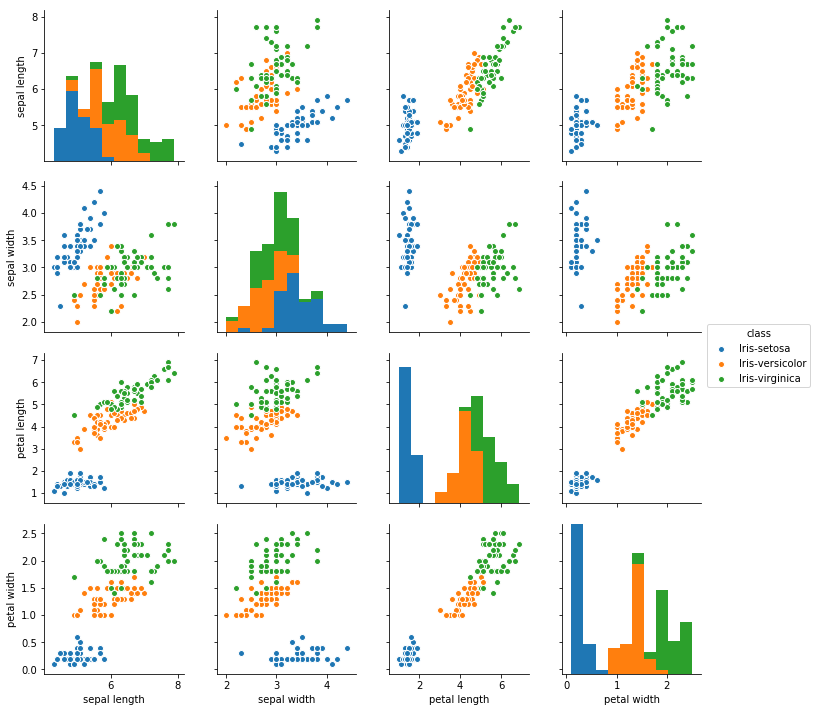

In [8]:
sns.pairplot(df, hue='class')
# feature-feature plot,points with different class using different color. single feature in the diag

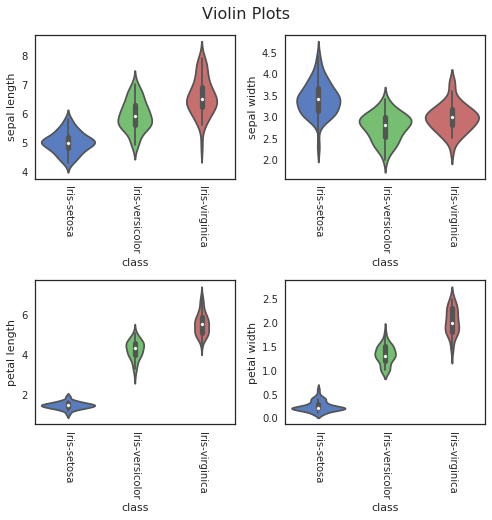

In [13]:
# plot
fig, ax = plt.subplots(2,2,figsize=(7,7))
# color
sns.set(style='white', palette='muted')
# violin plot
sns.violinplot(x=df['class'],y=df['sepal length'],ax=ax[0,0])
sns.violinplot(x=df['class'],y=df['sepal width'],ax=ax[0,1])
sns.violinplot(x=df['class'],y=df['petal length'],ax=ax[1,0])
sns.violinplot(x=df['class'],y=df['petal width'],ax=ax[1,1])
# title
fig.suptitle('Violin Plots', fontsize=16, y=1.03)
# x-axis
for i in ax.flat:
    plt.setp(i.get_xticklabels(),rotation=-90)
# show
fig.tight_layout()

# statsmodels

Text(0.5,1.02,'Setosa Sepal Width vs. Sepal Length')

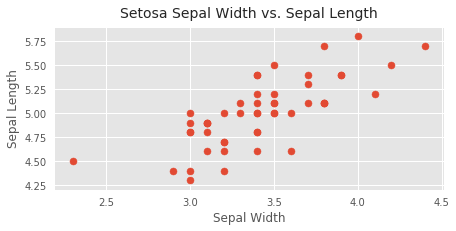

In [29]:
# set fig
fig, ax = plt.subplots(figsize=(7,3))
ax.scatter(df['sepal width'][:50], df['sepal length'][:50])
# names
ax.set_ylabel('Sepal Length')
ax.set_xlabel('Sepal Width')
ax.set_title('Setosa Sepal Width vs. Sepal Length', fontsize=14, y=1.02)

In [41]:
# linear reg
y = df['sepal length'][:50]
x = df['sepal width'][:50]
x1 = sm.add_constant(x)
# OLS
results = sm.OLS(y,x1).fit()
# print is better than original
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:           sepal length   R-squared:                       0.558
Model:                            OLS   Adj. R-squared:                  0.548
Method:                 Least Squares   F-statistic:                     60.52
Date:                Tue, 22 May 2018   Prob (F-statistic):           4.75e-10
Time:                        10:44:35   Log-Likelihood:                 2.0879
No. Observations:                  50   AIC:                           -0.1759
Df Residuals:                      48   BIC:                             3.648
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           2.6447      0.305      8.660      

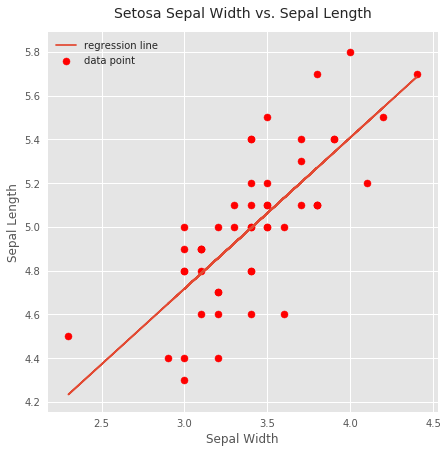

In [43]:
fig, ax = plt.subplots(figsize=(7,7))
ax.plot(x, results.fittedvalues, label='regression line')
ax.scatter(x, y, label='data point', color='r')
ax.set_ylabel('Sepal Length')
ax.set_xlabel('Sepal Width')
ax.set_title('Setosa Sepal Width vs. Sepal Length', fontsize=14, y=1.02)
ax.legend(loc=2)

# scikit-learn

In [64]:
# Random Forest
clf = RandomForestClassifier(max_depth=5, n_estimators=10)
X = df.iloc[:,:4]
y = df.iloc[:,4]
# seperate to test and train groups
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
# train it
clf.fit(X_train,y_train)
# predict it
y_pred = clf.predict(X_test)
# rf:predict and real
rf = pd.DataFrame(list(zip(y_pred, y_test)),columns=['predicted','actual'])
rf['correct'] = rf['predicted']==rf['actual']
print(rf.head(),'\n-----------------------\n',
      'correct:',rf['correct'].sum()/rf['correct'].count())

         predicted           actual  correct
0      Iris-setosa      Iris-setosa     True
1   Iris-virginica   Iris-virginica     True
2  Iris-versicolor  Iris-versicolor     True
3      Iris-setosa      Iris-setosa     True
4  Iris-versicolor  Iris-versicolor     True 
-----------------------
 correct: 0.9555555555555556


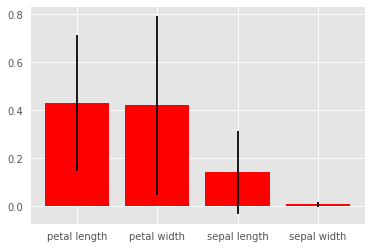

In [100]:
# feature importances
f_importances = clf.feature_importances_
f_names = df.columns[:4]
f_std = np.std([tree.feature_importances_ for tree in clf.estimators_], axis=0)

# f_importances,f_names,f_std together
zz = zip(f_importances, f_names, f_std)
zzs = sorted(zz, key=lambda x: x[0], reverse=True)

# get imps,labels,errs from zzs
imps = [x[0] for x in zzs]
labels = [x[1] for x in zzs]
errs = [x[2] for x in zzs]

# plot
plt.bar(range(len(f_importances)), imps, color="r", yerr=errs, align="center")
plt.xticks(range(len(f_importances)), labels);

In [115]:
# SVM
clf = OneVsRestClassifier(SVC(kernel = 'linear'))
X = df.iloc[:,:4]
y = df.iloc[:,4].astype(str)
# seperate to test and train groups
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
# train it
clf.fit(X_train,y_train)
# predict it
y_pred = clf.predict(X_test)
# rf:predict and real
rf = pd.DataFrame(list(zip(y_pred, y_test)),columns=['predicted','actual'])
rf['correct'] = rf['predicted']==rf['actual']
print(rf.head(),'\n-----------------------\n',
      'correct:',rf['correct'].sum()/rf['correct'].count())

         predicted           actual  correct
0   Iris-virginica  Iris-versicolor    False
1      Iris-setosa      Iris-setosa     True
2  Iris-versicolor  Iris-versicolor     True
3   Iris-virginica   Iris-virginica     True
4   Iris-virginica   Iris-virginica     True 
-----------------------
 correct: 0.9777777777777777
